## Types of Missing Values


#### 1. Missing Completely at Random

In [2]:
import pandas as pd

In [5]:
dataset = pd.read_csv('titanic_train.csv')
pd.set_option('display.max_columns', None)

In [6]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
dataset['Embarked'].isnull().sum()

2

In [9]:
dataset[dataset['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


ABOVE is the perfect example of Missing Completely at Random

#### 2. Missing data not at random (MNAR): Systematic missing values

In [10]:
import numpy as np

In [11]:
dataset['Cabin_null']=np.where(dataset['Cabin'].isnull(),1,0)

In [12]:
dataset['Cabin_null'].mean()

0.7710437710437711

ABOVE I am printing the percentage of missing values in Cabin Column

In [15]:
dataset.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

#### 3. Missing at Random (MAR)

men hiding their salary.
women hiding their age.

## Techniques to Handle Missing Values:

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

#### Mean/ Median/Mode replacement

In [16]:
dataset = pd.read_csv('titanic_train.csv', usecols=['Age', 'Fare','Survived'])

In [17]:
dataset.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
dataset.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
dtype: float64

In [18]:
def impute_mean(data, variable, median):
    data[variable+'_median']= data[variable].fillna(median)

In [19]:
impute_mean(dataset, 'Age', dataset.Age.median())

In [20]:
dataset.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


#### Random Sample Imputation

In [25]:
dataset = pd.read_csv('titanic_train.csv', usecols=['Age', 'Fare','Survived'])

In [26]:
dataset.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [29]:
dataset['Age'].isnull().sum()

177

In [31]:
dataset['Age'].dropna().sample(dataset['Age'].isnull().sum(),random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [32]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [33]:
impute_nan(dataset, 'Age', dataset.Age.median())

In [34]:
dataset.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


#### Capturing NAN values with a new feature

In [35]:
dataset['Age_nan']= np.where(dataset['Age'].isnull(),1,0)

In [36]:
dataset.head()

,Survived,Age,Fare,Age_median,Age_random,Age_nan
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0


#### End of Distribution imputation

<AxesSubplot:>

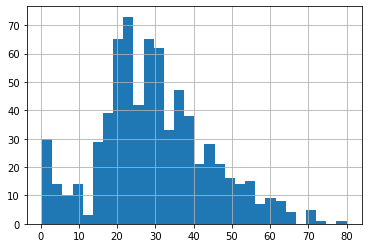

In [38]:
dataset.Age.hist(bins=30)

C:\Users\15876\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

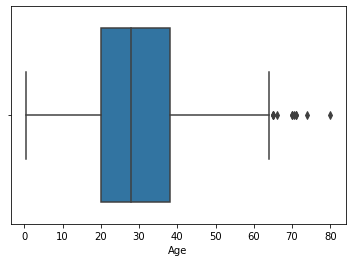

In [47]:
import seaborn as sns
sns.boxplot('Age',data=dataset)

In [41]:
extreme = dataset.Age.mean()+3*dataset.Age.std()

In [43]:
def impute_nan(data, variable, median, extreme):
    data[variable+'_end_imputation']= data[variable].fillna(extreme)
    data[variable].fillna(median)

In [45]:
impute_nan(dataset, 'Age', dataset.Age.median(), extreme)

In [46]:
dataset.head()

,Survived,Age,Fare,Age_median,Age_random,Age_nan,Age_end_imputation
0,0,22.0,7.2500,22.0,22.0,0,22.0
1,1,38.0,71.2833,38.0,38.0,0,38.0
2,1,26.0,7.9250,26.0,26.0,0,26.0
3,1,35.0,53.1000,35.0,35.0,0,35.0
4,0,35.0,8.0500,35.0,35.0,0,35.0


<AxesSubplot:>

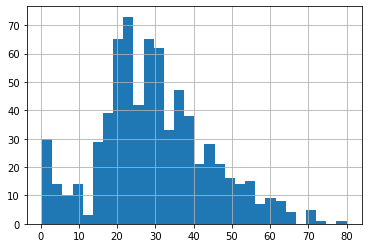

In [50]:
dataset.Age.hist(bins=30)

<AxesSubplot:>

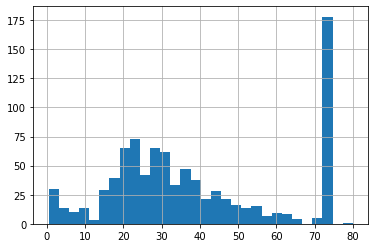

In [49]:
dataset.Age_end_imputation.hist(bins=30)

C:\Users\15876\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_imputation'>

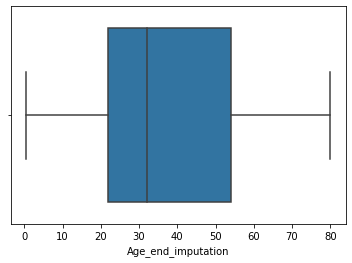

In [48]:
sns.boxplot('Age_end_imputation',data=dataset)

As We can see no outlairs are there.